In [1]:
!pip install schedule

In [2]:
!pip install pymongo

In [3]:
import schedule
import requests
import urllib
from bs4 import BeautifulSoup
from selenium import webdriver as wd
from selenium.webdriver.common.by import By
import re
import pymongo
from pymongo import MongoClient
import json

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import datetime

In [4]:
def parsing():
    url = 'https://rosseti-lenenergo.ru/planned_work/'
    pages = requests.get(url)
    soup = BeautifulSoup(pages.text, 'lxml')
    table1 = soup.find('table', class_='tableous_facts funds')
    # print(table1)
    headers = []
    for i in table1.find_all('th')[:-4]:
        title = i.text
        headers.append(title)
        if len(headers) == 5 or len(headers) == 7:
            title += ' Время'
            headers.append(title)
    print(headers)
    
    client = MongoClient("localhost", 27017)
    database = client["Rosseti"]
    col_name = database.power_off
    db_rows={}


    mydata = pd.DataFrame(columns=headers)
    browser = wd.Chrome()
    browser.get('https://rosseti-lenenergo.ru/planned_work/')

    date_from = browser.find_element(By.ID, "fdate_tender_start")
    date_from.send_keys("18.09.2023")
    date_to = browser.find_element(By.ID, "fdate_tender_finish")
    date_to.send_keys("25.09.2023")
    find_but = browser.find_element(By.CLASS_NAME, "tenders__searchform-submit")
    find_but.click()

    for k in range(6):
        soup = BeautifulSoup(browser.page_source, 'lxml')
        table1 = soup.find('table', class_='tableous_facts funds')
        next_page = browser.find_element(By.CLASS_NAME, "next")
        for j in table1.find_all('tr')[2:]:
            row_data = j.find_all('td')
            row = [i.text for i in row_data]
            length = len(mydata)
            mydata.loc[length] = row
            db_rows.pop('_id', None)
            for idx,el in enumerate(row):
                db_rows[headers[idx]]=el
            col_name.insert_one(db_rows)
        
            
        next_page.click()
#     print(mydata)
    mydata.to_csv('planned_works_Rosseti.csv', index=False)

In [5]:
def run():
    schedule.every().day.at('15:09').do(parsing)
    while True:
        schedule.run_pending()

In [6]:
from threading import Thread
thread = Thread(target=run)
thread.start()

In [7]:
mydata=pd.read_csv('planned_works_Rosseti.csv')
mydata

,"Регион РФ(область, край, город фед. значения, округ)",Административный район,Населённый пункт,Улица,Плановое время начала отключения электроснабжения,Плановое время начала отключения электроснабжения Время,Плановое время восстановления отключения электроснабжения,Плановое время восстановления отключения электроснабжения Время,Филиал,РЭС,Комментарий
0,Санкт-Петербург,Центральный район,Санкт-Петербург,"9-я Советская ул. .д. 11-13, 15, 19, 23, 8...",25-09-2023,13:00,25-09-2023,17:00,Кабельная сеть,Центральный РЭС,NaN
1,Санкт-Петербург,Фрунзенский район,г. Санкт-Петербург,"Будапештская ул., д. 3, лит. А.",25-09-2023,11:00,25-09-2023,17:00,Кабельная сеть,Невский РЭС,NaN
2,Санкт-Петербург,Приморский район (СПб),Санкт-Петербург,ул. Долгоозерная д. 12 к. 2.,25-09-2023,11:00,25-09-2023,15:00,Кабельная сеть,Западный РЭС,NaN
3,Санкт-Петербург,Приморский район (СПб),Санкт-Петербург,"ул. Яхтенная д. 32 к. 2, ул. Яхтенная д. 32 к...",25-09-2023,10:00,25-09-2023,17:00,Кабельная сеть,Западный РЭС,NaN
4,Ленинградская область,Всеволожский район,"пром зона Птице фабрика невская, д. Аньялово.",NaN,25-09-2023,10:00,25-09-2023,17:00,Северные электрические сети,Сертоловский РЭС,NaN
...,...,...,...,...,...,...,...,...,...,...,...
295,Ленинградская область,Выборгский район (ЛО),п.Ермилово,частично,19-09-2023,10:00,22-09-2023,17:00,Выборгские ЭС,Выборгский РЭС,NaN
296,Ленинградская область,Выборгский район (ЛО),п.Козлово,частично,19-09-2023,10:00,19-09-2023,16:00,Выборгские ЭС,Выборгский РЭС,NaN
297,Санкт-Петербург,Василеостровский район,Санкт-Петербург,"Средний пр., д. 61, д. 65/41; 15-я линия, д...",19-09-2023,10:00,19-09-2023,18:00,Кабельная сеть,Островной РЭС,NaN
298,Ленинградская область,Кингисеппский район,Тикопись,NaN,19-09-2023,10:00,19-09-2023,17:00,Кингисеппские ЭС,Кингисеппский РЭС,NaN


In [8]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 11 columns):
 #   Column                                                           Non-Null Count  Dtype 
---  ------                                                           --------------  ----- 
 0   Регион РФ(область, край, город фед. значения, округ)             299 non-null    object
 1   Административный район                                           298 non-null    object
 2   Населённый пункт                                                 300 non-null    object
 3   Улица                                                            179 non-null    object
 4   Плановое время начала отключения электроснабжения                300 non-null    object
 5   Плановое время начала отключения электроснабжения Время          300 non-null    object
 6   Плановое время восстановления отключения электроснабжения        300 non-null    object
 7   Плановое время восстановления отключения электроснабж

In [9]:
mydata=mydata.fillna('')
mydata['Id здания']=pd.Series(dtype='float64')
mydata['Координаты']=pd.Series(dtype='string')

In [10]:
size=len(mydata)
idx_to_del=[]
for i in range(size):
    flag=False
    cur_row=mydata.iloc[i]
    addresses=cur_row['Улица']
    adress = re.findall(r'[А-Яа-я]+[,\s\.]{1,5}[А-Яа-я]+[,\s\.\(]{1,5}\w+.{1,2}\d+[\s,]{0,2}[клит]{0,}[\.,\s]{0,5}\d{0,1}[А,Б]{0,1}', addresses)
    for ad in adress:
        url = 'https://geocode.gate.petersburg.ru/parse/free?street='+urllib.parse.quote(ad)
        response = requests.get(url,auth=('user','Bearer 1234'))
        result = response.text
        if result.find('error')==-1:
            flag=True
            b_id=response.json().get('Building_ID')
            coords='['+str(response.json().get('Latitude'))+','+str(response.json().get('Longitude'))+']'
            mydata=mydata.append(cur_row, ignore_index=True)
            mydata.loc[len(mydata)-1,'Id здания']=b_id
            mydata.loc[len(mydata)-1,'Улица']=ad
            mydata.loc[len(mydata)-1,'Координаты']=coords
    if adress and flag:
        idx_to_del.append(i)

mydata=mydata.drop(index=idx_to_del)       

C:\Users\Юля\AppData\Local\Temp\ipykernel_13872\2128275171.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mydata=mydata.append(cur_row, ignore_index=True)


In [11]:
mydata

,"Регион РФ(область, край, город фед. значения, округ)",Административный район,Населённый пункт,Улица,Плановое время начала отключения электроснабжения,Плановое время начала отключения электроснабжения Время,Плановое время восстановления отключения электроснабжения,Плановое время восстановления отключения электроснабжения Время,Филиал,РЭС,Комментарий,Id здания,Координаты
4,Ленинградская область,Всеволожский район,"пром зона Птице фабрика невская, д. Аньялово.",,25-09-2023,10:00,25-09-2023,17:00,Северные электрические сети,Сертоловский РЭС,,NaN,NaN
8,Ленинградская область,Бокситогорский район,"д. Васьково, д.Максимово, д. Платаново, д. О...",,25-09-2023,10:00,25-09-2023,13:00,Тихвинские ЭС,Бокситогорский РЭС,,NaN,NaN
9,Ленинградская область,Гатчинский район,"д. Покровская, д. Антелево",,25-09-2023,10:00,25-09-2023,17:00,Южные электрические сети,Пушкинский РЭС,,NaN,NaN
11,Ленинградская область,Всеволожский район,"Свердлово, д.Овцино",,25-09-2023,10:00,25-09-2023,17:23,Северные электрические сети,Всеволожский РЭС,,NaN,NaN
12,Ленинградская область,Ломоносовский район,"д.Капорское, д. Кемпелево, д.Тиммолово, д.Я...",,25-09-2023,10:00,25-09-2023,20:00,Южные электрические сети,Красносельский РЭС,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,Санкт-Петербург,Петроградский район,Санкт-Петербург,"Петровский пр., д. 20 лит.",19-09-2023,10:00,19-09-2023,18:00,Кабельная сеть,Островной РЭС,,18468.0,"[59.959628646,30.266563336]"
551,Санкт-Петербург,Петроградский район,Санкт-Петербург,"Петроградская наб., д. 26",19-09-2023,10:00,19-09-2023,18:00,Кабельная сеть,Островной РЭС,,45935.0,"[59.960926086,30.333552441]"
552,Санкт-Петербург,Адмиралтейский район,Санкт-Петербург,"Рижский пр., д. 58,",19-09-2023,10:00,19-09-2023,22:00,Кабельная сеть,Центральный РЭС,Аварийные работы,218689.0,"[59.913039035,30.275333913]"
553,Санкт-Петербург,Красногвардейский район,Санкт-Петербург,"Пискаревский пр., д.37",19-09-2023,10:00,19-09-2023,17:00,Кабельная сеть,Восточный РЭС,,36407.0,"[59.977813167,30.420732429]"


In [12]:
mydata['Id здания'].info()

<class 'pandas.core.series.Series'>
Int64Index: 477 entries, 4 to 554
Series name: Id здания
Non-Null Count  Dtype  
--------------  -----  
255 non-null    float64
dtypes: float64(1)
memory usage: 7.5 KB


In [13]:
mydata.to_csv('planned_works_Rosseti_with_build_id.csv', index=False)

mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 4 to 554
Data columns (total 13 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Регион РФ(область, край, город фед. значения, округ)             477 non-null    object 
 1   Административный район                                           477 non-null    object 
 2   Населённый пункт                                                 477 non-null    object 
 3   Улица                                                            477 non-null    object 
 4   Плановое время начала отключения электроснабжения                477 non-null    object 
 5   Плановое время начала отключения электроснабжения Время          477 non-null    object 
 6   Плановое время восстановления отключения электроснабжения        477 non-null    object 
 7   Плановое время восстановления отключения эле

In [14]:
districts = mydata['Административный район'].unique()
districts

array(['Всеволожский район', 'Бокситогорский район', 'Гатчинский район ',
       'Ломоносовский район', 'Волосовский район', 'Тосненский район',
       'Лужский район', 'Колпинский район', 'Лодейнопольский район',
       'Фрунзенский район', 'Красногвардейский район',
       'Приозерский район', 'Выборгский район (ЛО)', 'Киришский район',
       'Кингисеппский район', 'Волховский район', 'Тихвинский район',
       'Приморский район (СПб)', 'Красносельский район',
       'Пушкинский район', 'Кировский район (ЛО)', 'Подпорожский район',
       '', 'Калининский район', 'Выборгский район (СПб)',
       'Центральный район ', 'Петроградский район', 'Курортный район',
       'Невский район', 'Московский район', 'Василеостровский район',
       'Сланцевский район', 'Адмиралтейский район'], dtype=object)

In [15]:
mydata['Плановое время начала отключения электроснабжения'].unique()

array(['25-09-2023', '24-09-2023', '23-09-2023', '22-09-2023',
       '21-09-2023', '20-09-2023', '19-09-2023'], dtype=object)

In [16]:
mydata['Филиал'].unique()

array(['Северные электрические сети', 'Тихвинские ЭС',
       'Южные электрические сети', 'Кингисеппские ЭС', 'Гатчинские ЭС',
       'Новоладожские ЭС', 'Кабельная сеть', 'Выборгские ЭС', ''],
      dtype=object)

In [17]:
mydata['РЭС'].unique()

array(['Сертоловский РЭС', 'Бокситогорский РЭС', 'Пушкинский РЭС',
       'Всеволожский РЭС', 'Красносельский РЭС', 'Кингисеппский РЭС',
       'Тосненский РЭС', 'Ломоносовский РЭС', 'Лужский РЭС',
       'Колпинский РЭС', 'Лодейнопольский РЭС', 'Южный РЭС',
       'Правобережный РЭС', 'Приозерский РЭС', 'Рощинский РЭС',
       'Петродворцовый  РЭС', 'Гатчинский РЭС', 'Тихвинский РЭС',
       'Волховский РЭС', '', 'Западный РЭС', 'Выборгский РЭС',
       'Восточный РЭС', 'Центральный РЭС', 'Невский РЭС', 'Островной РЭС',
       'Курортный РЭС', 'Северный РЭС', 'Песочинский РЭС',
       'Юго-Западный РЭС'], dtype=object)

In [18]:
mydata["Время начала отключения"] = mydata["Плановое время начала отключения электроснабжения"] +' '+ mydata["Плановое время начала отключения электроснабжения Время"]
mydata["Время начала отключения"]=pd.to_datetime(mydata['Время начала отключения'])

mydata["Время восстановления отключения"] = mydata["Плановое время восстановления отключения электроснабжения"] +' '+ mydata["Плановое время восстановления отключения электроснабжения Время"]
mydata["Время восстановления отключения"]=pd.to_datetime(mydata['Время восстановления отключения'])

date_labels=['Плановое время начала отключения электроснабжения','Плановое время начала отключения электроснабжения Время','Плановое время восстановления отключения электроснабжения','Плановое время восстановления отключения электроснабжения Время']
mydata=mydata.drop(date_labels, axis=1)

mydata['Код района']=mydata['Административный район'].apply(lambda x:  x[:4]+x[-5:] if x[:4]=='Выбо' else  x[:4]+x[6] if x[:4]=='Крас' else x[:4])
mydata['Код РЭС']=mydata['РЭС'].apply(lambda x: x[:4])
mydata['Код района'].unique()

array(['Всев', 'Бокс', 'Гатч', 'Ломо', 'Воло', 'Тосн', 'Лужс', 'Колп',
       'Лоде', 'Фрун', 'Красг', 'Прио', 'Выбо (ЛО)', 'Кири', 'Кинг',
       'Волх', 'Тихв', 'Прим', 'Красс', 'Пушк', 'Киро', 'Подп', '',
       'Кали', 'Выбо(СПб)', 'Цент', 'Петр', 'Куро', 'Невс', 'Моск',
       'Васи', 'Слан', 'Адми'], dtype=object)

In [19]:
mydata["Период отключения(в часах)"] = (mydata["Время восстановления отключения"] - mydata["Время начала отключения"]).dt.seconds//3600
mydata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 4 to 554
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Регион РФ(область, край, город фед. значения, округ)  477 non-null    object        
 1   Административный район                                477 non-null    object        
 2   Населённый пункт                                      477 non-null    object        
 3   Улица                                                 477 non-null    object        
 4   Филиал                                                477 non-null    object        
 5   РЭС                                                   477 non-null    object        
 6   Комментарий                                           477 non-null    object        
 7   Id здания                                             255 non-null    float64   

In [20]:
mydata.describe()

,Id здания,Период отключения(в часах)
count,255.000000,477.000000
mean,80604.015686,8.412998
std,58449.698301,2.404320
min,1936.000000,0.000000
25%,36419.500000,7.000000
50%,75047.000000,8.000000
75%,109187.000000,11.000000
max,224707.000000,13.000000


За сколько отключённых адресов отвественна каждая РЭС

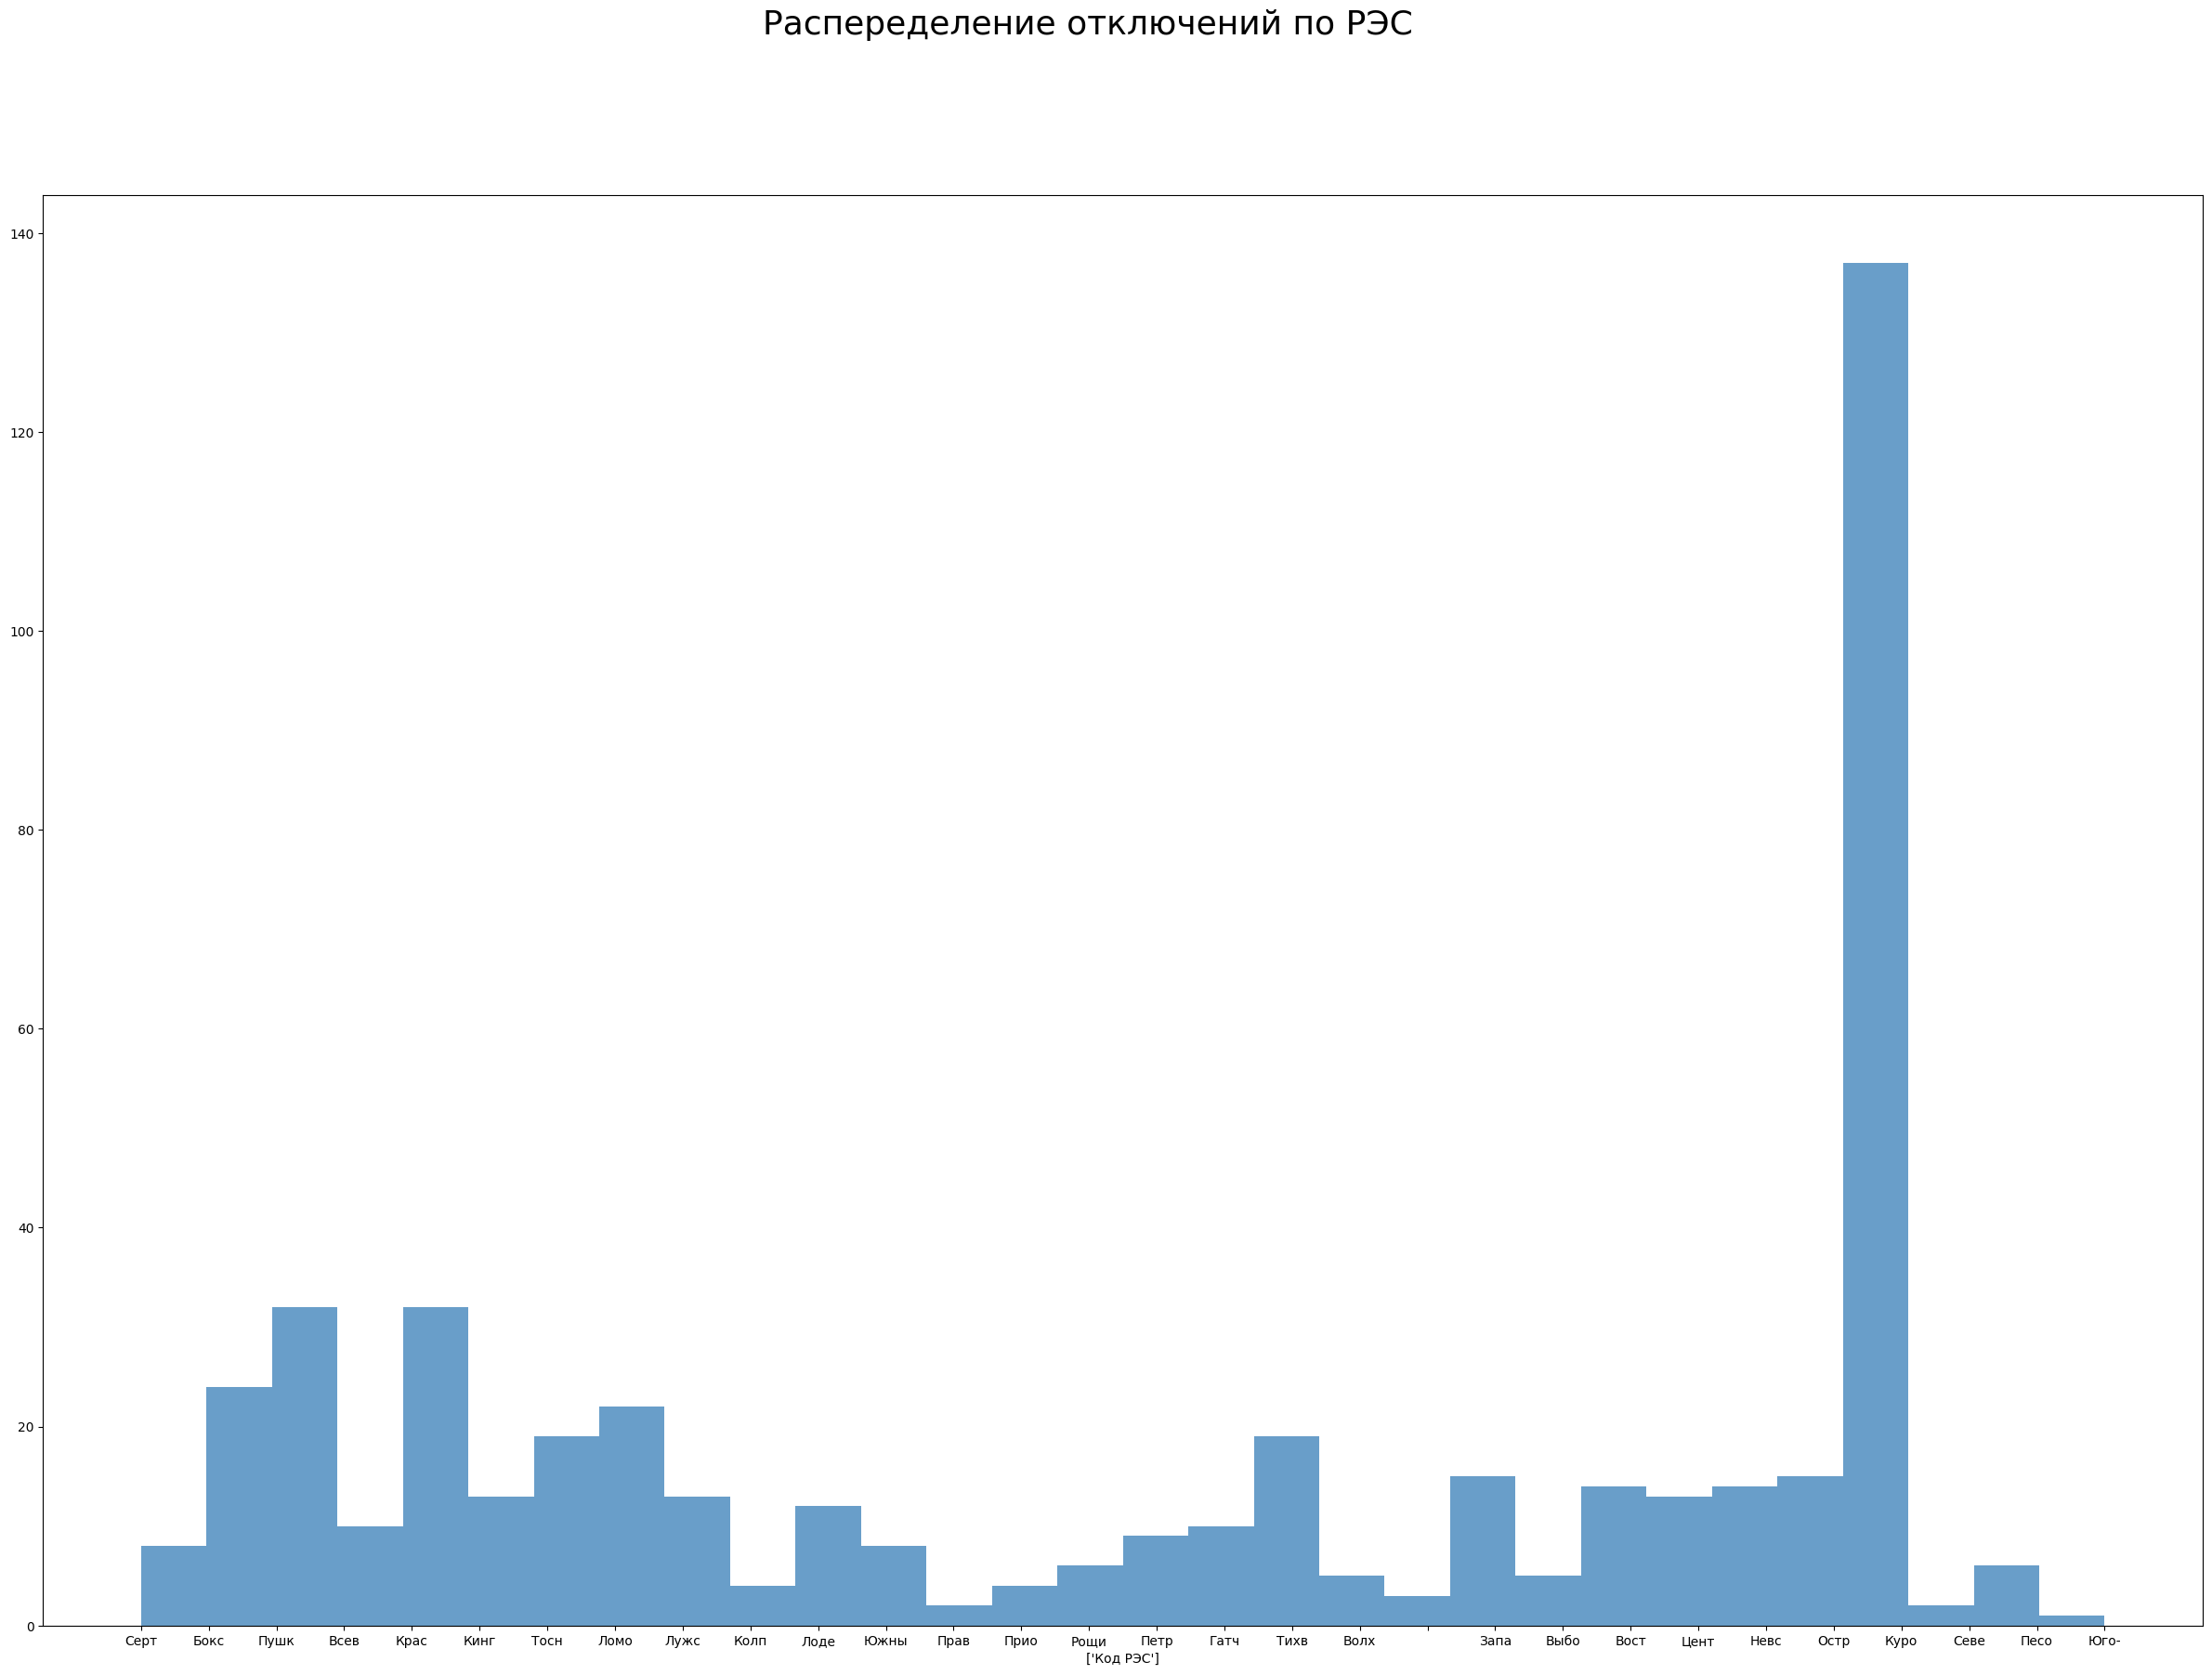

In [21]:
fig, ax = plt.subplots(figsize=(30, 20))
label=['Код РЭС']
ax.set_yscale('linear')   
ax.tick_params(labelsize=10)
ax.set_xlabel(label)
fig.suptitle('Распеределение отключений по РЭС', fontsize=26)

ax.hist(mydata[label], bins=30, color='#377eb8', alpha=.75) # синий 
plt.show()

За сколько отключённых адресов отвественна каждый филиал

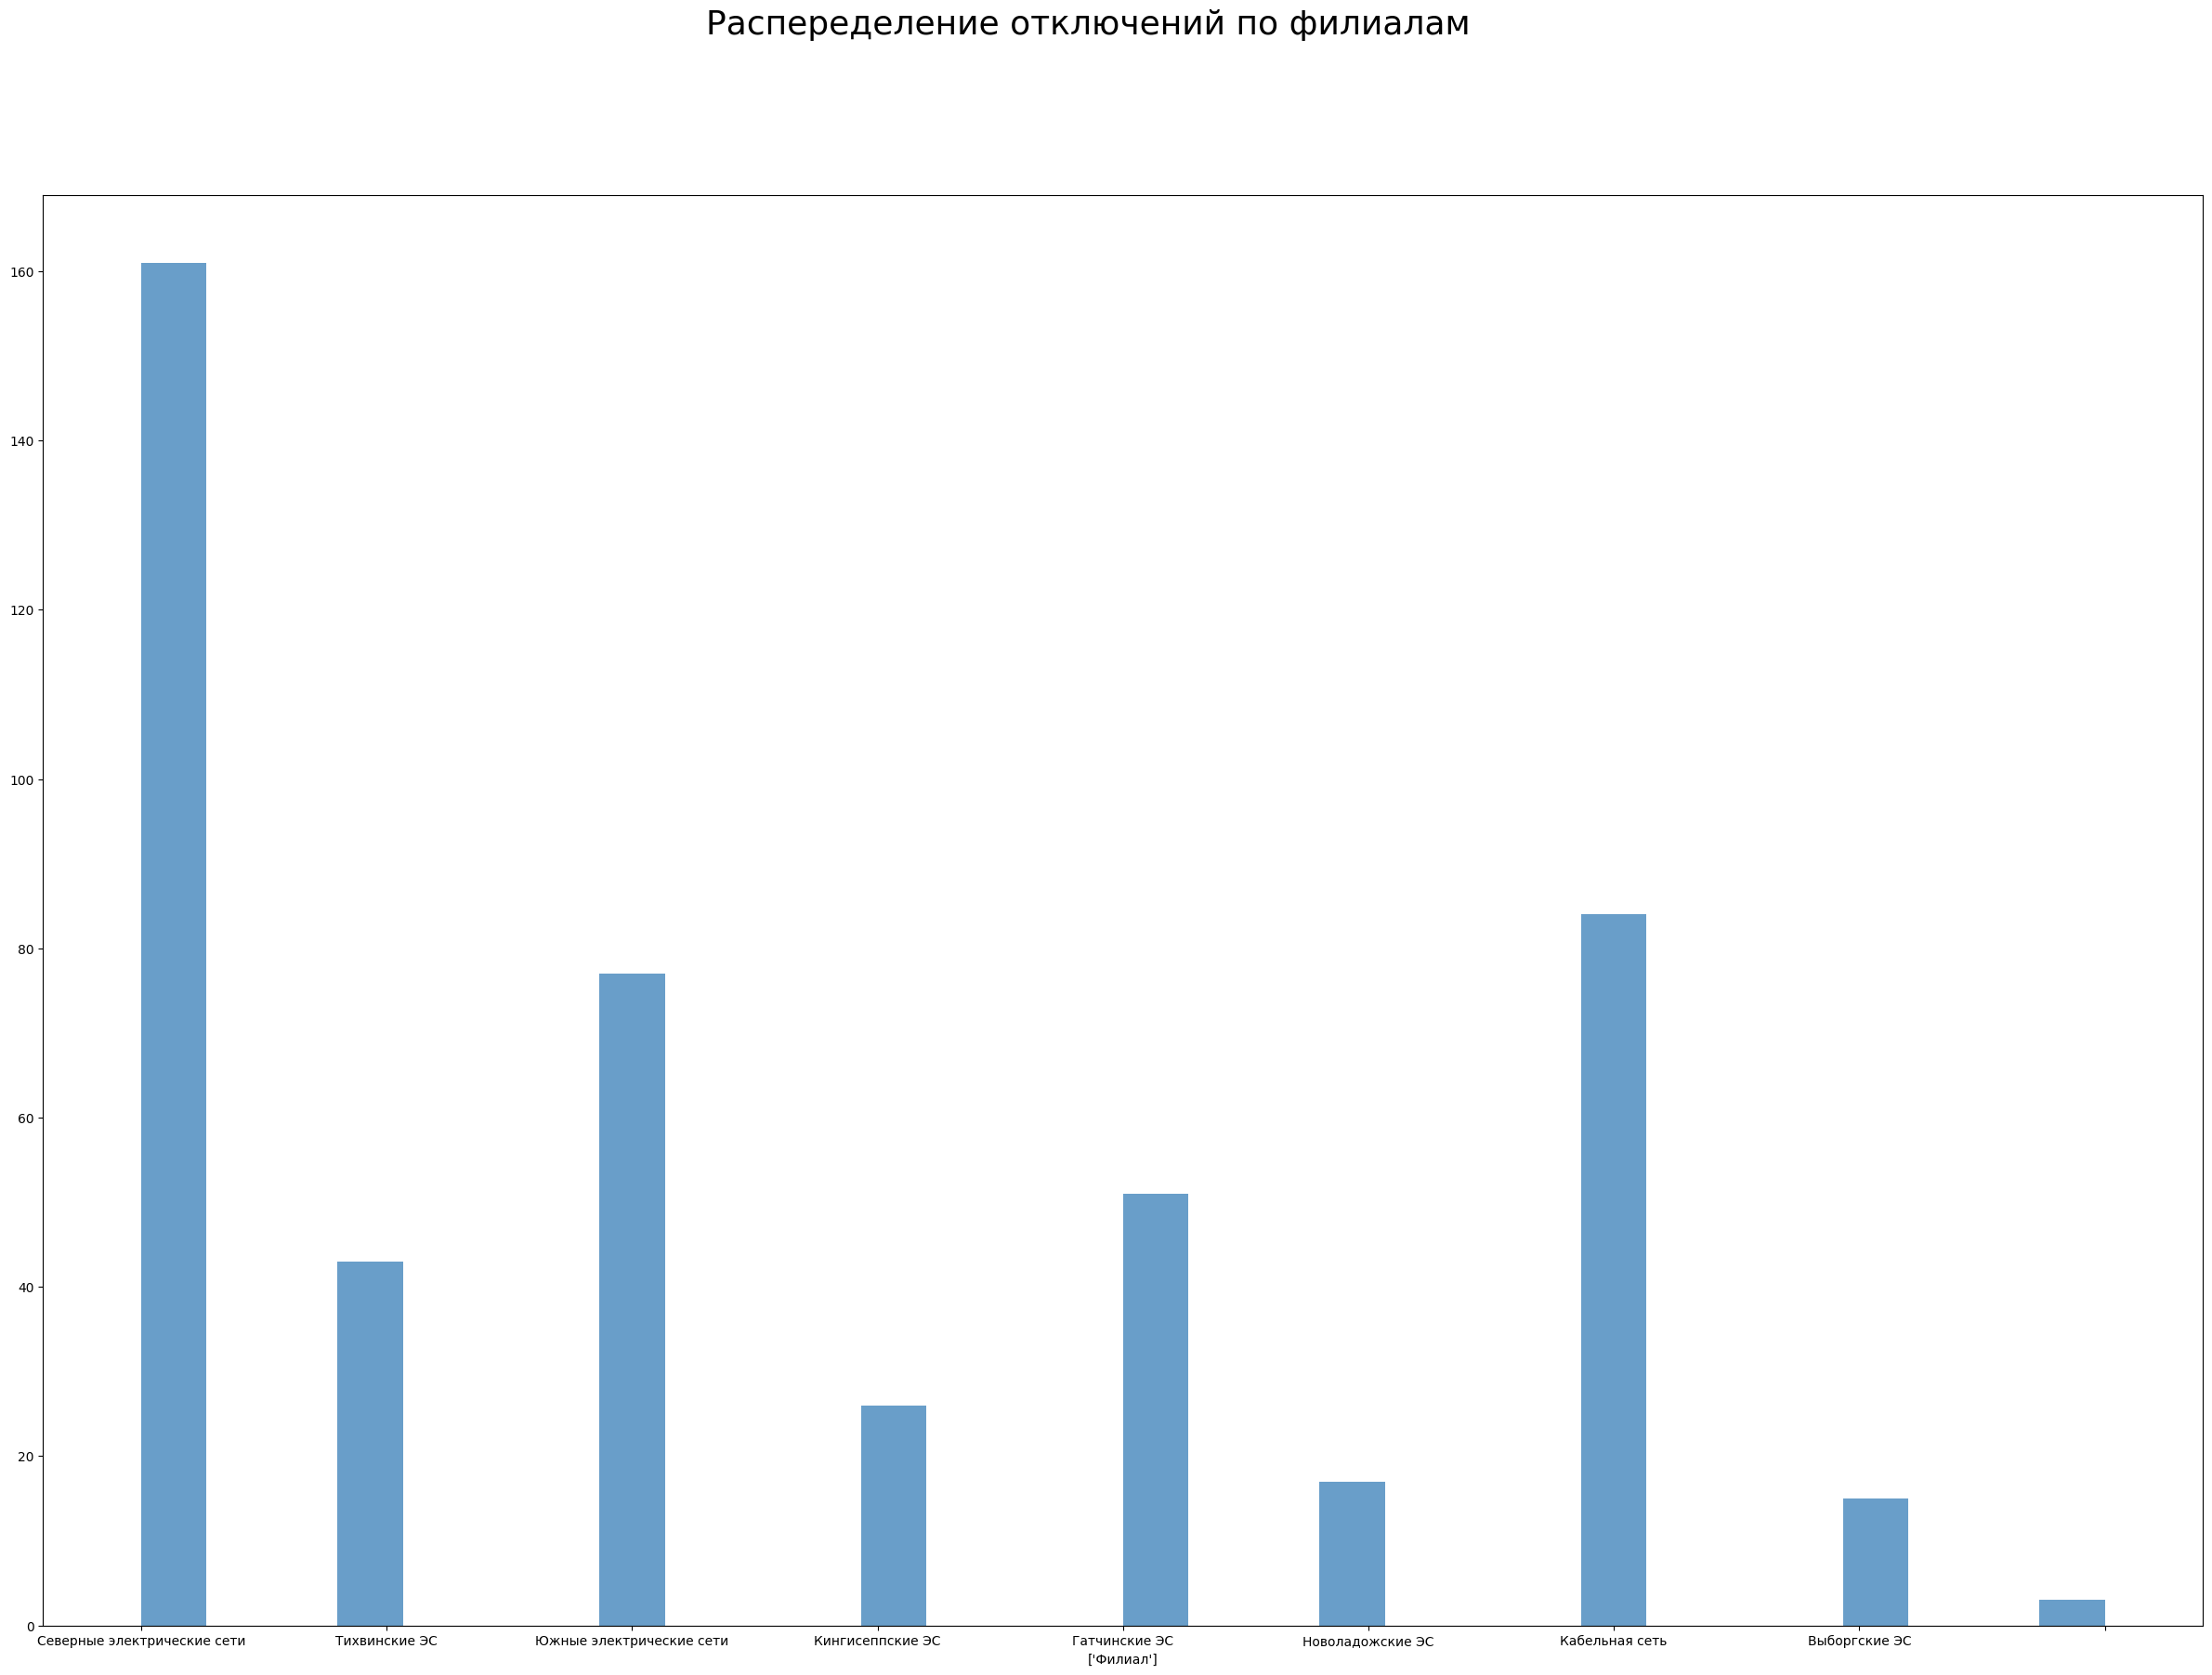

In [22]:
fig, ax = plt.subplots(figsize=(30, 20))
label=['Филиал']
ax.set_yscale('linear')   
ax.tick_params(labelsize=10)
ax.set_xlabel(label)
fig.suptitle('Распеределение отключений по филиалам', fontsize=26)

ax.hist(mydata[label], bins=30, color='#377eb8', alpha=.75) # синий 
plt.show()

Сколько обесточенных адресов каждом районе

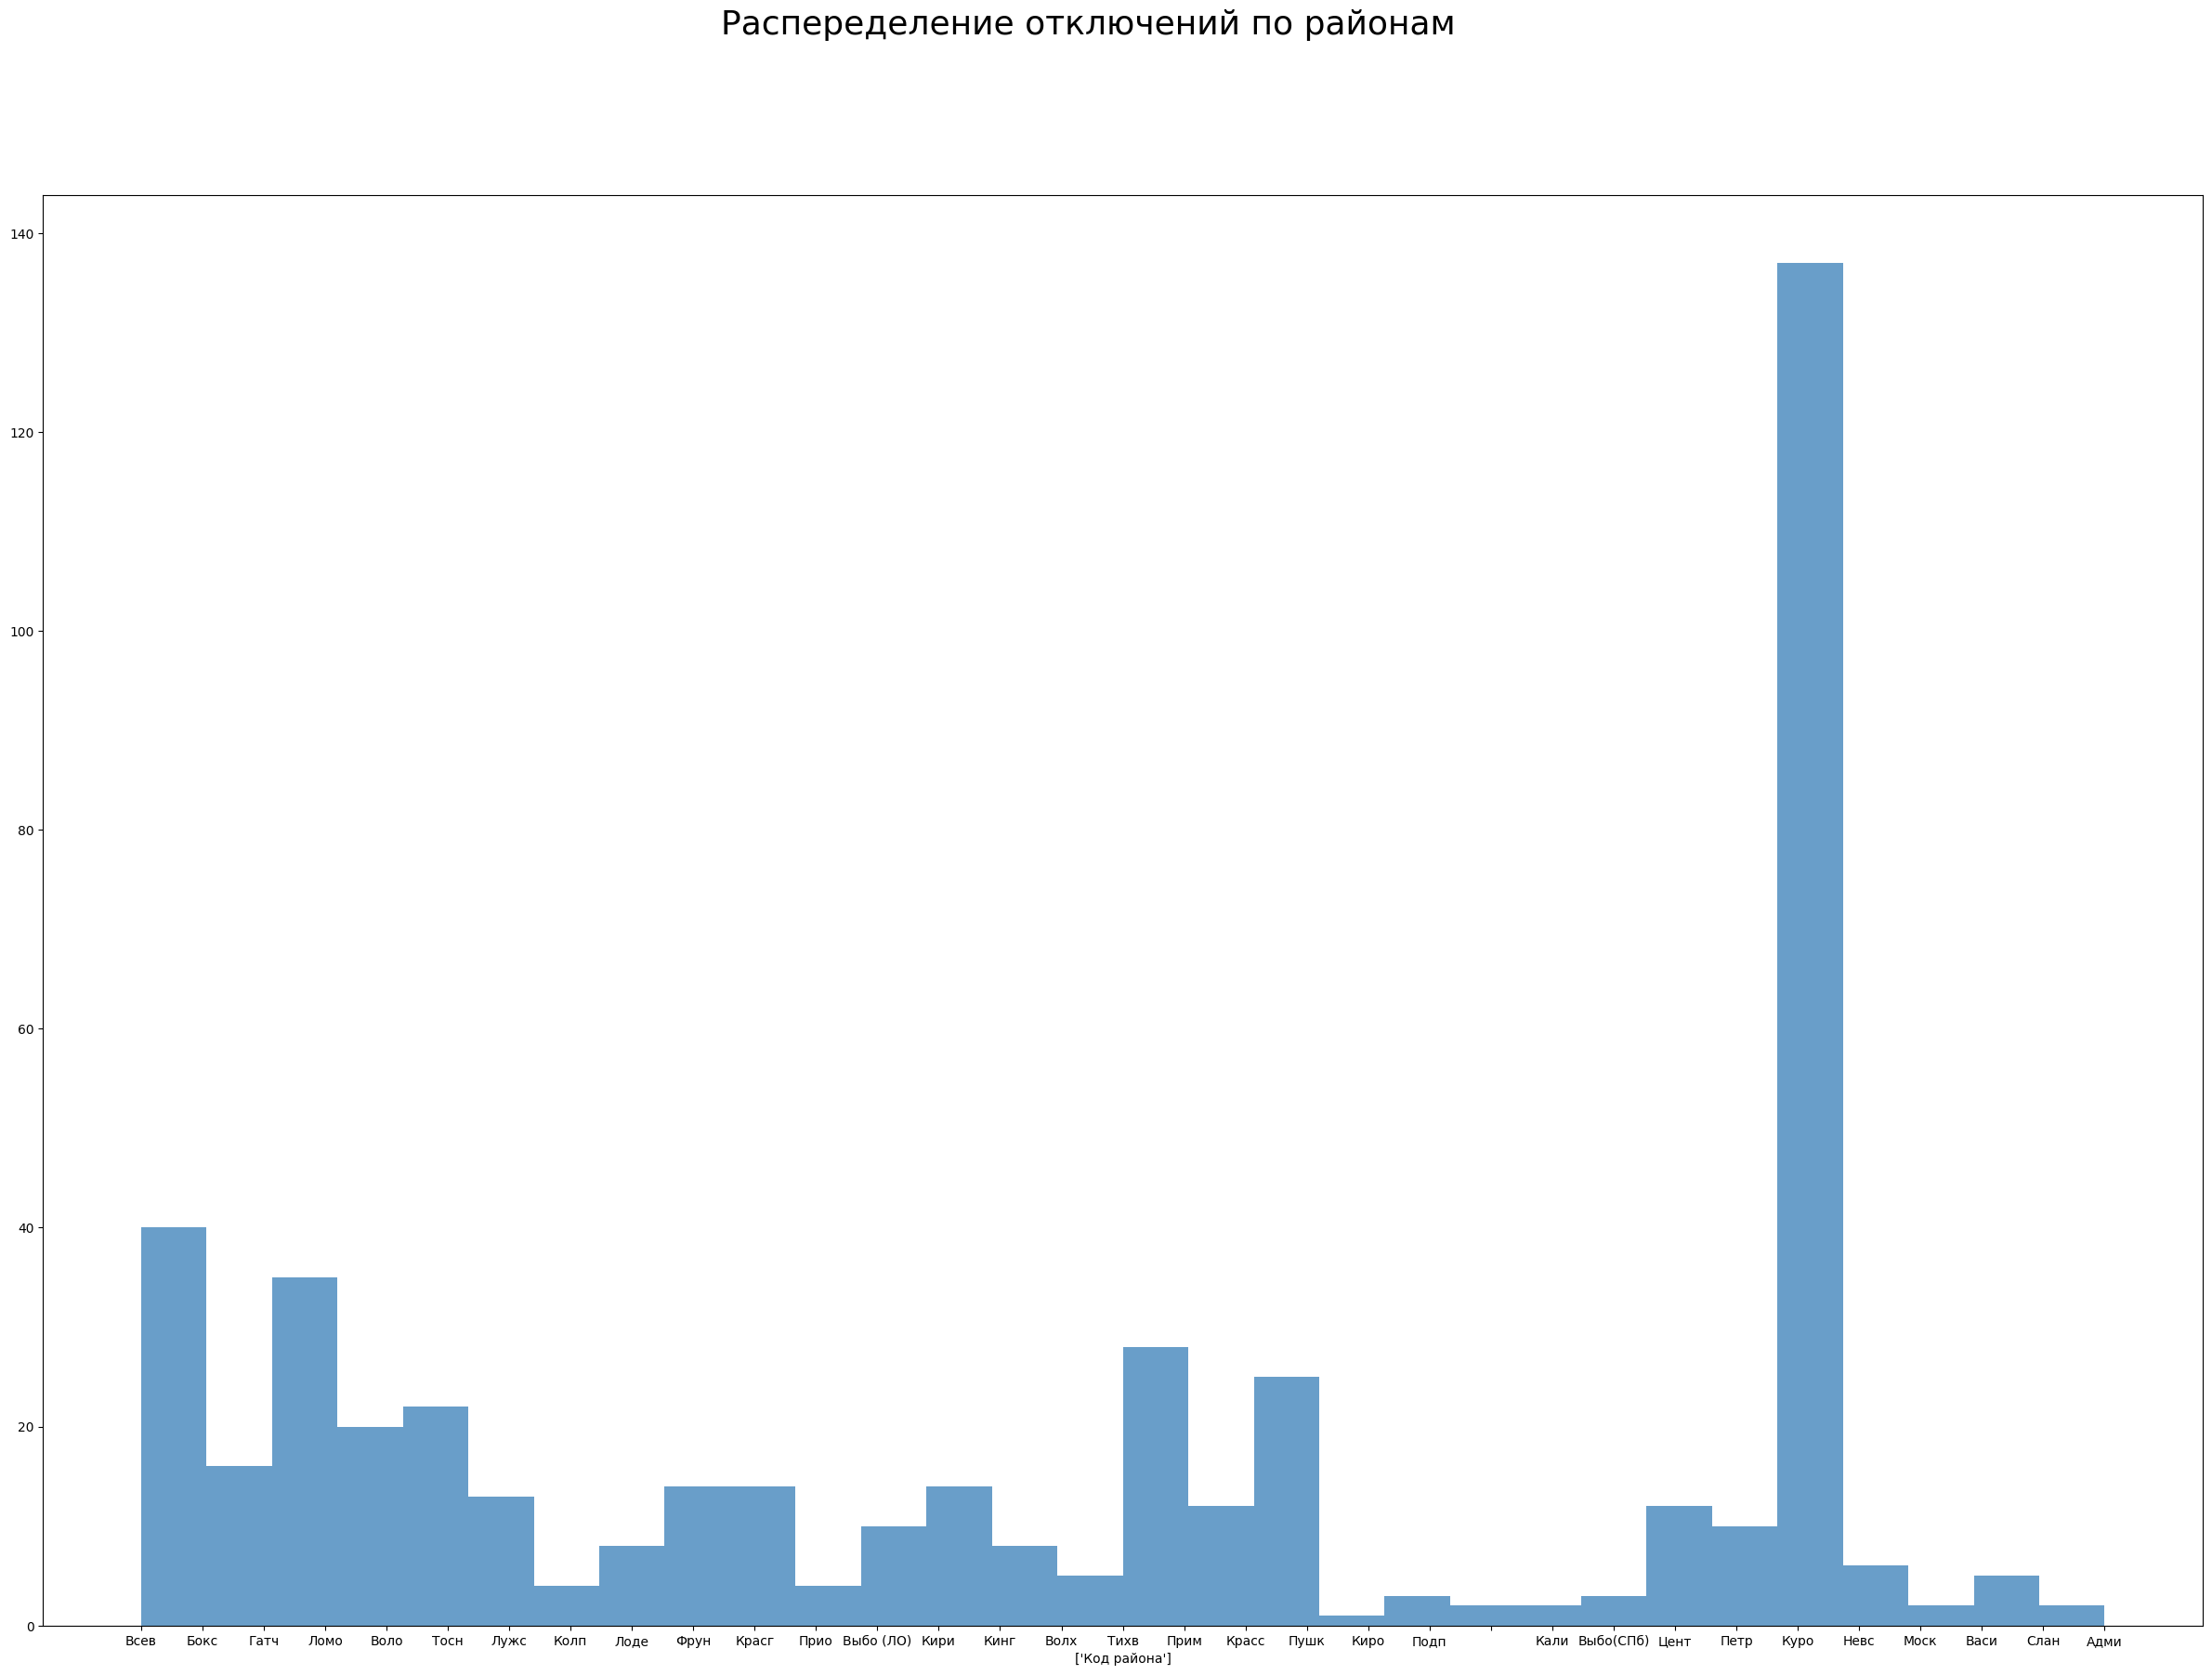

In [23]:
fig, ax = plt.subplots(figsize=(30, 20))
label=['Код района']
ax.set_yscale('linear')   
ax.tick_params(labelsize=10)
ax.set_xlabel(label)
fig.suptitle('Распеределение отключений по районам', fontsize=26)

ax.hist(mydata[label], bins=30, color='#377eb8', alpha=.75) # синий 
plt.show()

Средняя длина отключения по часам

In [24]:
dist_codes = mydata['Код района'].unique()
period_for_dist={}
for d in districts:
    period_for_dist[d]=mydata[mydata['Административный район']==d]['Период отключения(в часах)'].mean()
period_for_dist

{'Всеволожский район': 7.333333333333333,
 'Бокситогорский район': 8.545454545454545,
 'Гатчинский район ': 7.8125,
 'Ломоносовский район': 7.485714285714286,
 'Волосовский район': 7.25,
 'Тосненский район': 6.409090909090909,
 'Лужский район': 7.923076923076923,
 'Колпинский район': 4.25,
 'Лодейнопольский район': 5.25,
 'Фрунзенский район': 6.071428571428571,
 'Красногвардейский район': 8.357142857142858,
 'Приозерский район': 7.5,
 'Выборгский район (ЛО)': 5.6,
 'Киришский район': 7.5,
 'Кингисеппский район': 7.75,
 'Волховский район': 8.0,
 'Тихвинский район': 7.0,
 'Приморский район (СПб)': 7.571428571428571,
 'Красносельский район': 8.0,
 'Пушкинский район': 9.0,
 'Кировский район (ЛО)': 8.0,
 'Подпорожский район': 6.333333333333333,
 '': 7.0,
 'Калининский район': 9.0,
 'Выборгский район (СПб)': 6.333333333333333,
 'Центральный район ': 6.666666666666667,
 'Петроградский район': 6.4,
 'Курортный район': 11.0,
 'Невский район': 5.833333333333333,
 'Московский район': 5.5,
 'Васил

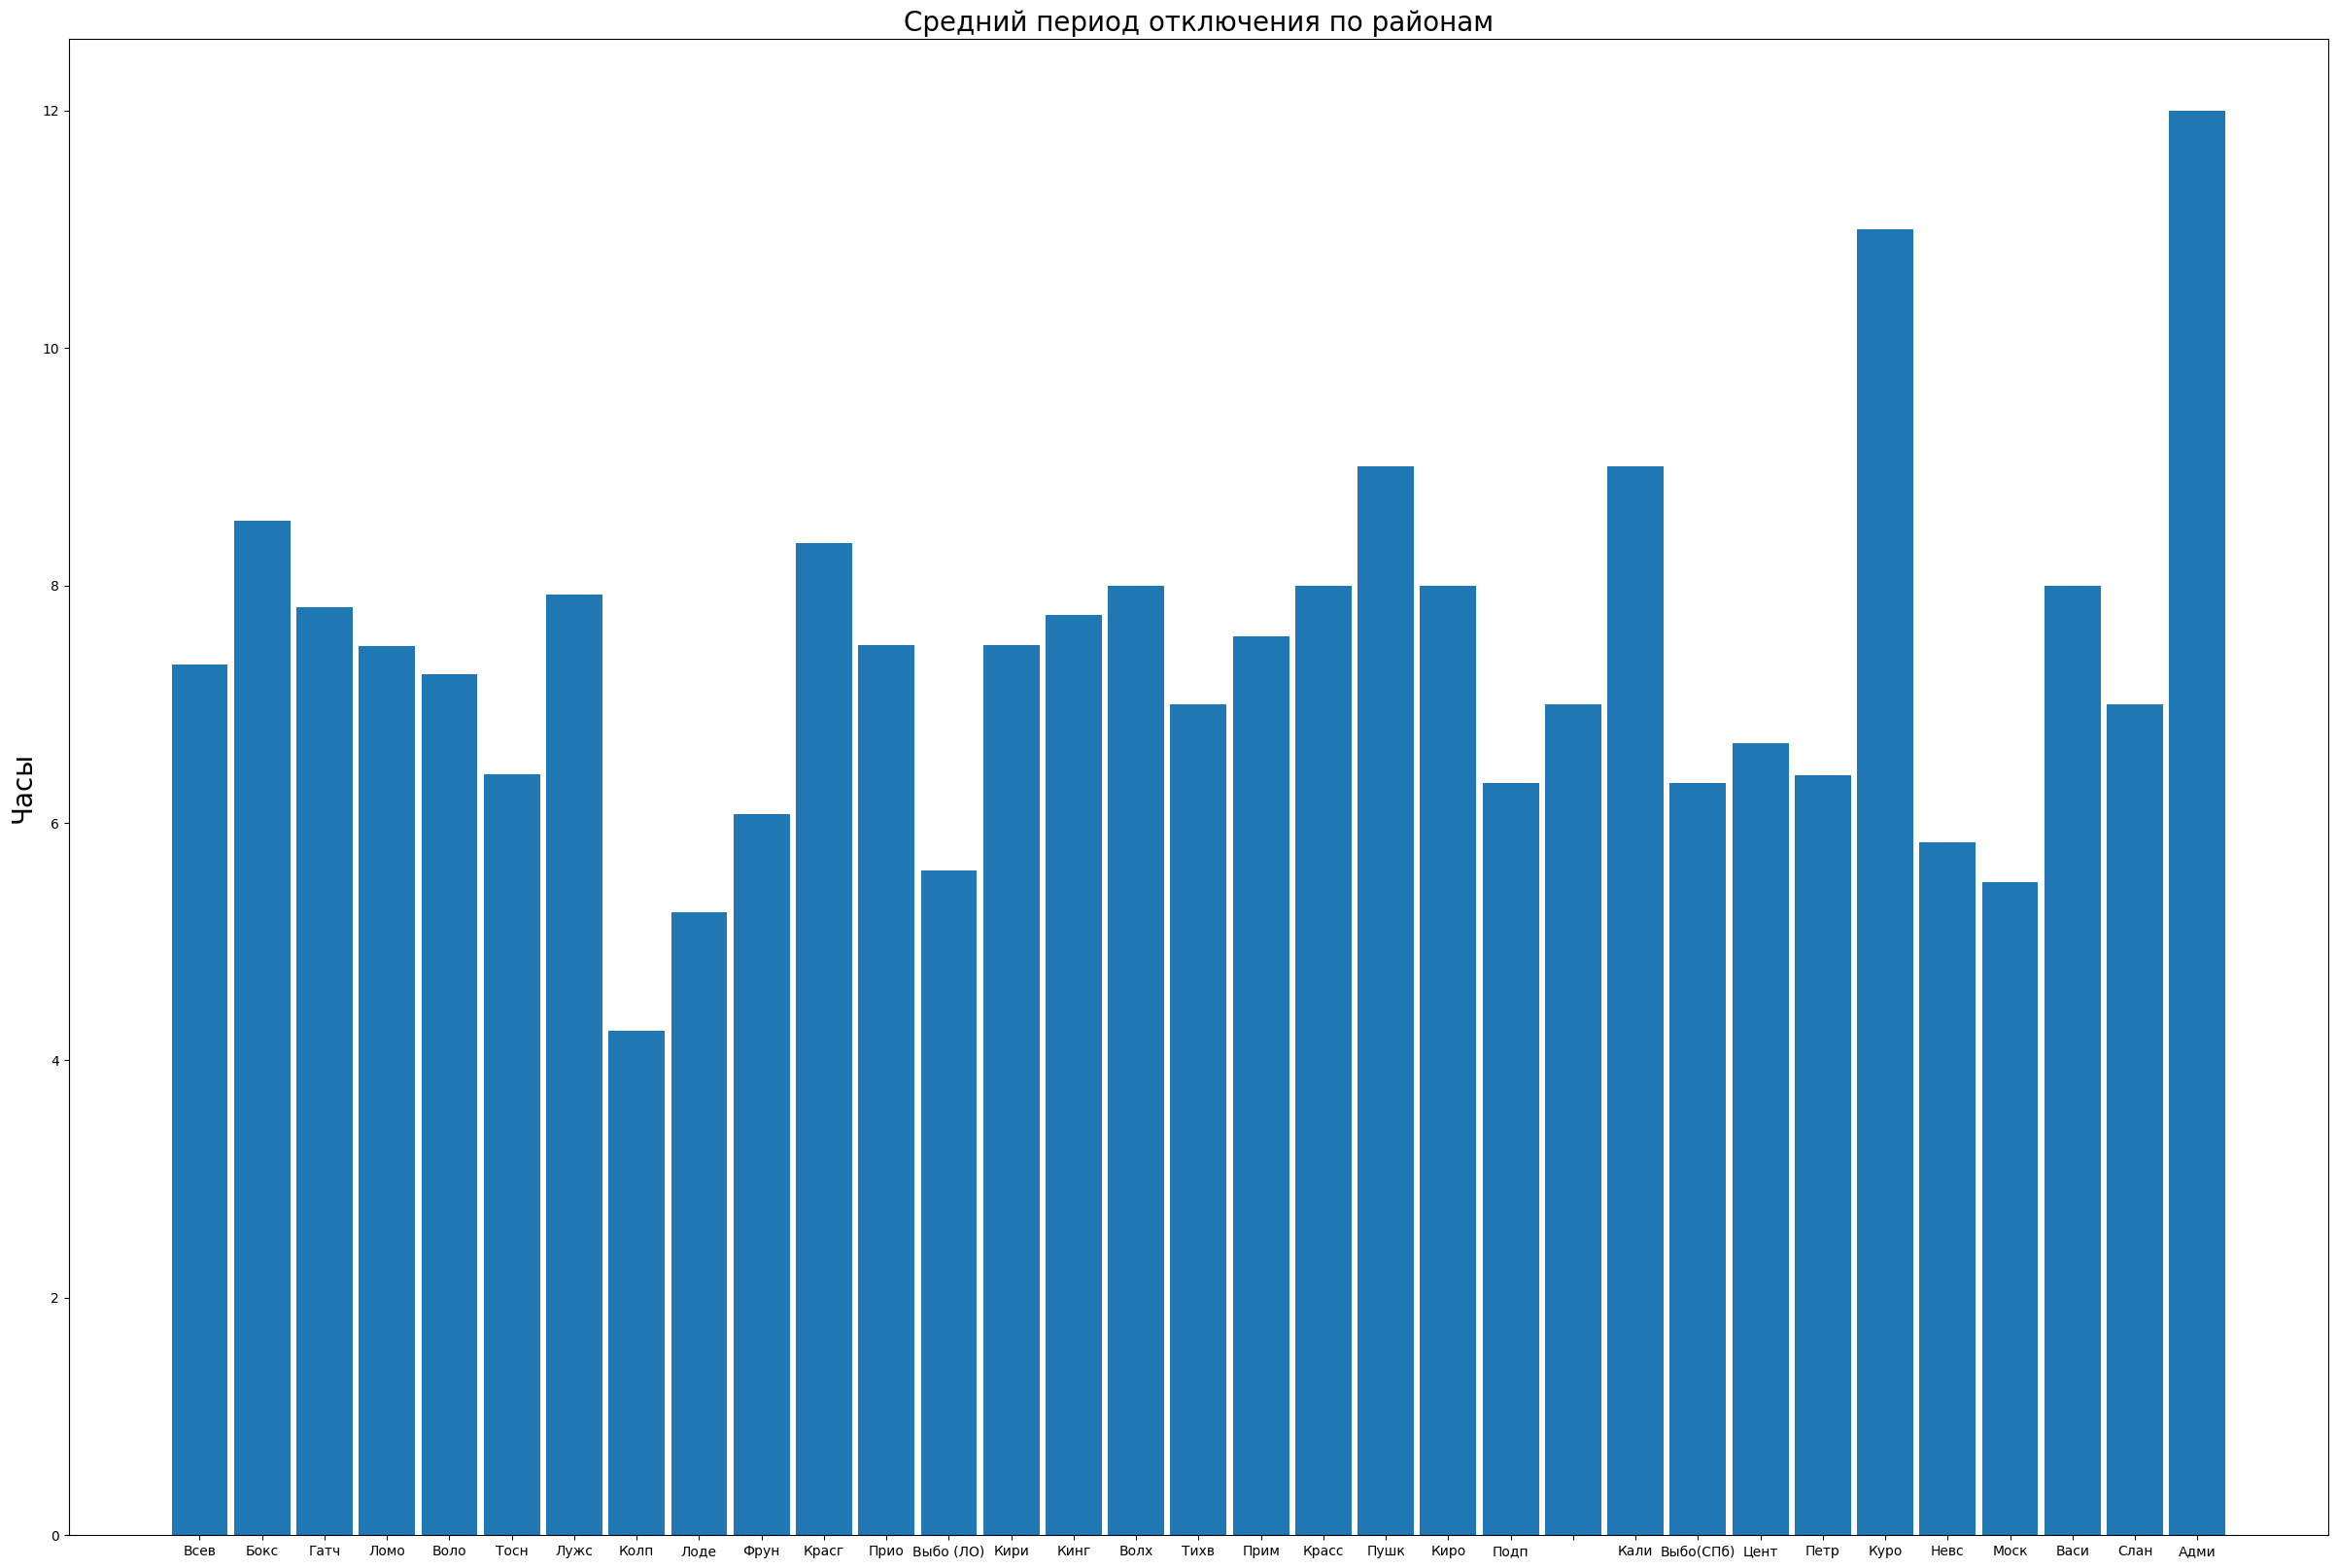

In [25]:
fig, ax = plt.subplots(figsize=(30, 20))
plt.title('Средний период отключения по районам',fontsize=20)
plt.bar(np.arange(len(period_for_dist)),period_for_dist.values(),width=0.9)
plt.xticks(np.arange(len(period_for_dist)),dist_codes, rotation=0)
plt.ylabel('Часы', fontsize=20)
plt.show()

In [26]:
mydata.to_csv('planned_works_Rosseti_changed.csv', index=False)
mydata_copy=mydata.copy()
mydata_copy

,"Регион РФ(область, край, город фед. значения, округ)",Административный район,Населённый пункт,Улица,Филиал,РЭС,Комментарий,Id здания,Координаты,Время начала отключения,Время восстановления отключения,Код района,Код РЭС,Период отключения(в часах)
4,Ленинградская область,Всеволожский район,"пром зона Птице фабрика невская, д. Аньялово.",,Северные электрические сети,Сертоловский РЭС,,NaN,NaN,2023-09-25 10:00:00,2023-09-25 17:00:00,Всев,Серт,7
8,Ленинградская область,Бокситогорский район,"д. Васьково, д.Максимово, д. Платаново, д. О...",,Тихвинские ЭС,Бокситогорский РЭС,,NaN,NaN,2023-09-25 10:00:00,2023-09-25 13:00:00,Бокс,Бокс,3
9,Ленинградская область,Гатчинский район,"д. Покровская, д. Антелево",,Южные электрические сети,Пушкинский РЭС,,NaN,NaN,2023-09-25 10:00:00,2023-09-25 17:00:00,Гатч,Пушк,7
11,Ленинградская область,Всеволожский район,"Свердлово, д.Овцино",,Северные электрические сети,Всеволожский РЭС,,NaN,NaN,2023-09-25 10:00:00,2023-09-25 17:23:00,Всев,Всев,7
12,Ленинградская область,Ломоносовский район,"д.Капорское, д. Кемпелево, д.Тиммолово, д.Я...",,Южные электрические сети,Красносельский РЭС,,NaN,NaN,2023-09-25 10:00:00,2023-09-25 20:00:00,Ломо,Крас,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,Санкт-Петербург,Петроградский район,Санкт-Петербург,"Петровский пр., д. 20 лит.",Кабельная сеть,Островной РЭС,,18468.0,"[59.959628646,30.266563336]",2023-09-19 10:00:00,2023-09-19 18:00:00,Петр,Остр,8
551,Санкт-Петербург,Петроградский район,Санкт-Петербург,"Петроградская наб., д. 26",Кабельная сеть,Островной РЭС,,45935.0,"[59.960926086,30.333552441]",2023-09-19 10:00:00,2023-09-19 18:00:00,Петр,Остр,8
552,Санкт-Петербург,Адмиралтейский район,Санкт-Петербург,"Рижский пр., д. 58,",Кабельная сеть,Центральный РЭС,Аварийные работы,218689.0,"[59.913039035,30.275333913]",2023-09-19 10:00:00,2023-09-19 22:00:00,Адми,Цент,12
553,Санкт-Петербург,Красногвардейский район,Санкт-Петербург,"Пискаревский пр., д.37",Кабельная сеть,Восточный РЭС,,36407.0,"[59.977813167,30.420732429]",2023-09-19 10:00:00,2023-09-19 17:00:00,Красг,Вост,7


In [27]:
cat_labels=['Регион РФ(область, край, город фед. значения, округ)','Код района','Филиал','Код РЭС','Населённый пункт']
encoder = {}
for x in cat_labels:
    encoder[x]=LabelEncoder()
    mydata_copy[x] = encoder[x].fit_transform(mydata_copy[x])
mydata_copy.describe()

,"Регион РФ(область, край, город фед. значения, округ)",Населённый пункт,Филиал,Id здания,Код района,Код РЭС,Период отключения(в часах)
count,477.000000,477.000000,477.000000,255.000000,477.000000,477.000000,477.000000
mean,1.557652,108.821803,5.117400,80604.015686,17.075472,13.289308,8.412998
std,0.501394,53.467454,2.127958,58449.698301,8.144607,7.187184,2.404320
min,0.000000,0.000000,0.000000,1936.000000,0.000000,0.000000,0.000000
25%,1.000000,63.000000,3.000000,36419.500000,12.000000,10.000000,7.000000
50%,2.000000,109.000000,6.000000,75047.000000,17.000000,11.000000,8.000000
75%,2.000000,167.000000,7.000000,109187.000000,22.000000,18.000000,11.000000
max,2.000000,182.000000,8.000000,224707.000000,32.000000,29.000000,13.000000


C:\Users\Юля\AppData\Local\Temp\ipykernel_13872\510693937.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr =corr_df.corr()


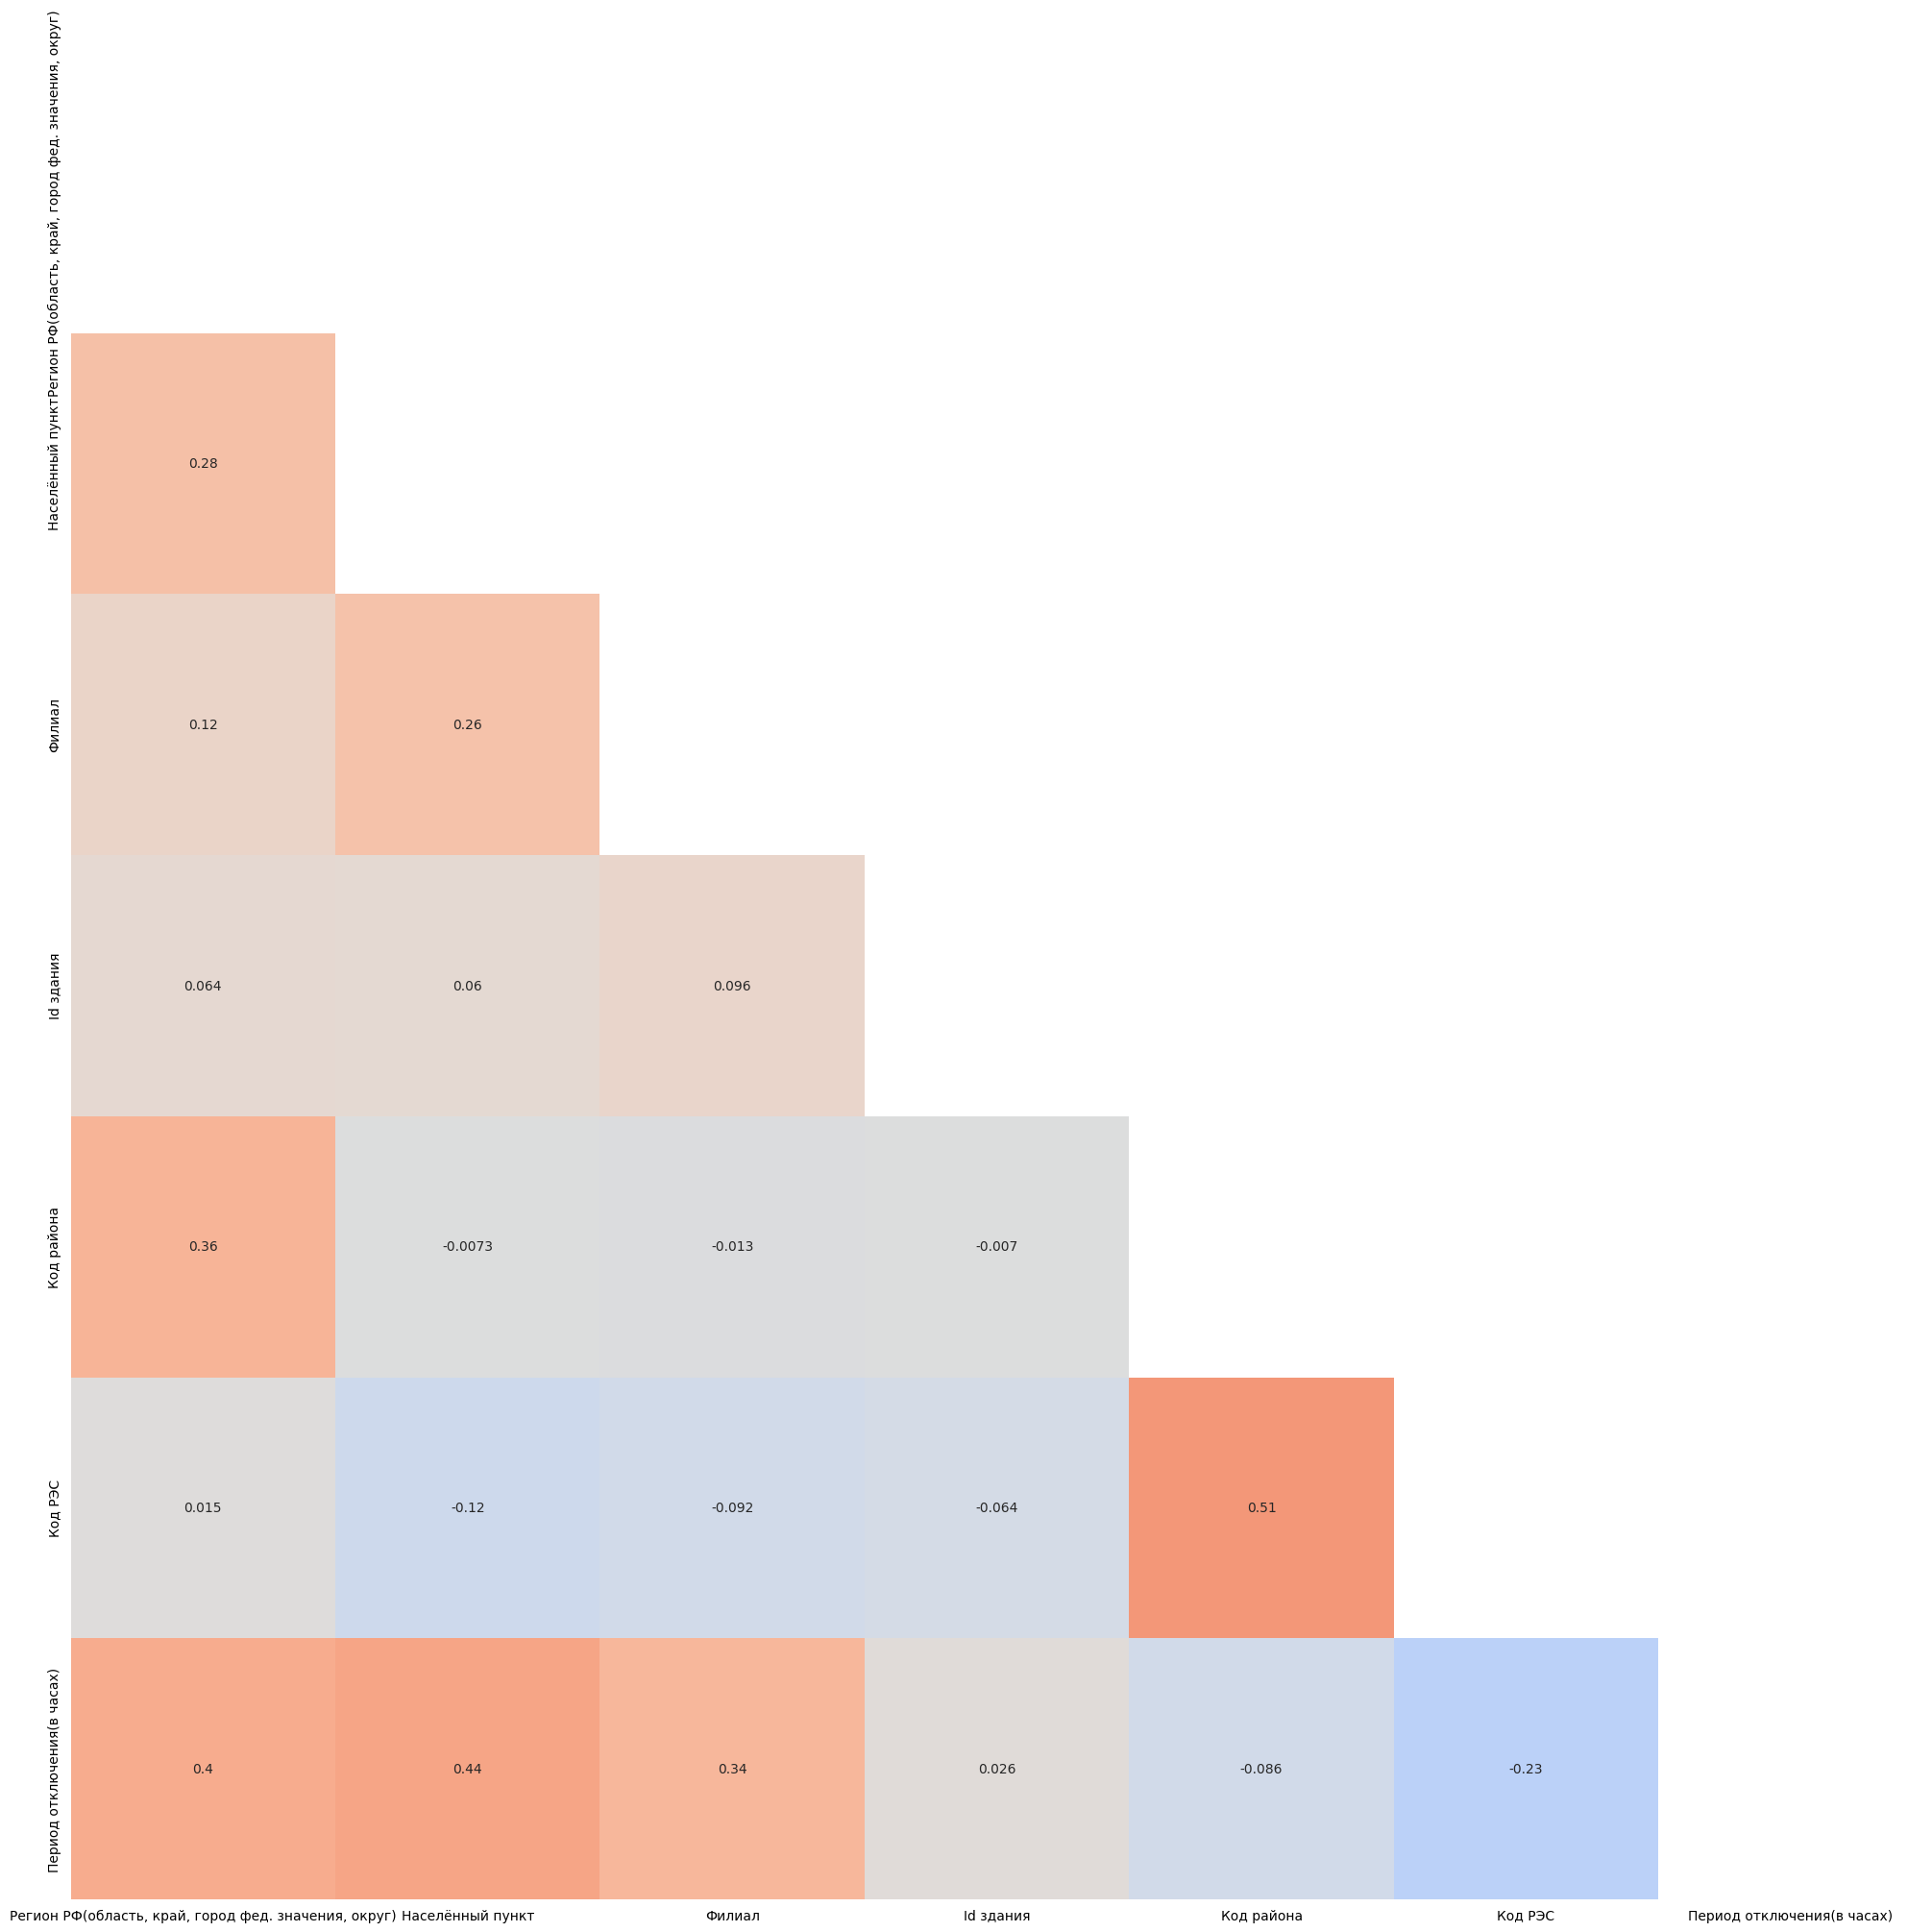

In [28]:
fig, ax = plt.subplots(figsize=(20, 20), constrained_layout=True)
corr_df=mydata_copy
corr =corr_df.corr()
mask = np.triu(np.ones_like(corr))
sns.heatmap(corr, cbar=False, mask=mask,ax=ax,annot=True, cmap='coolwarm',vmin=-1,vmax=1)
ax.tick_params(top=False,bottom=False,left=False,right=False,)

Количество обесточенных домов по датам и предсказание отключения

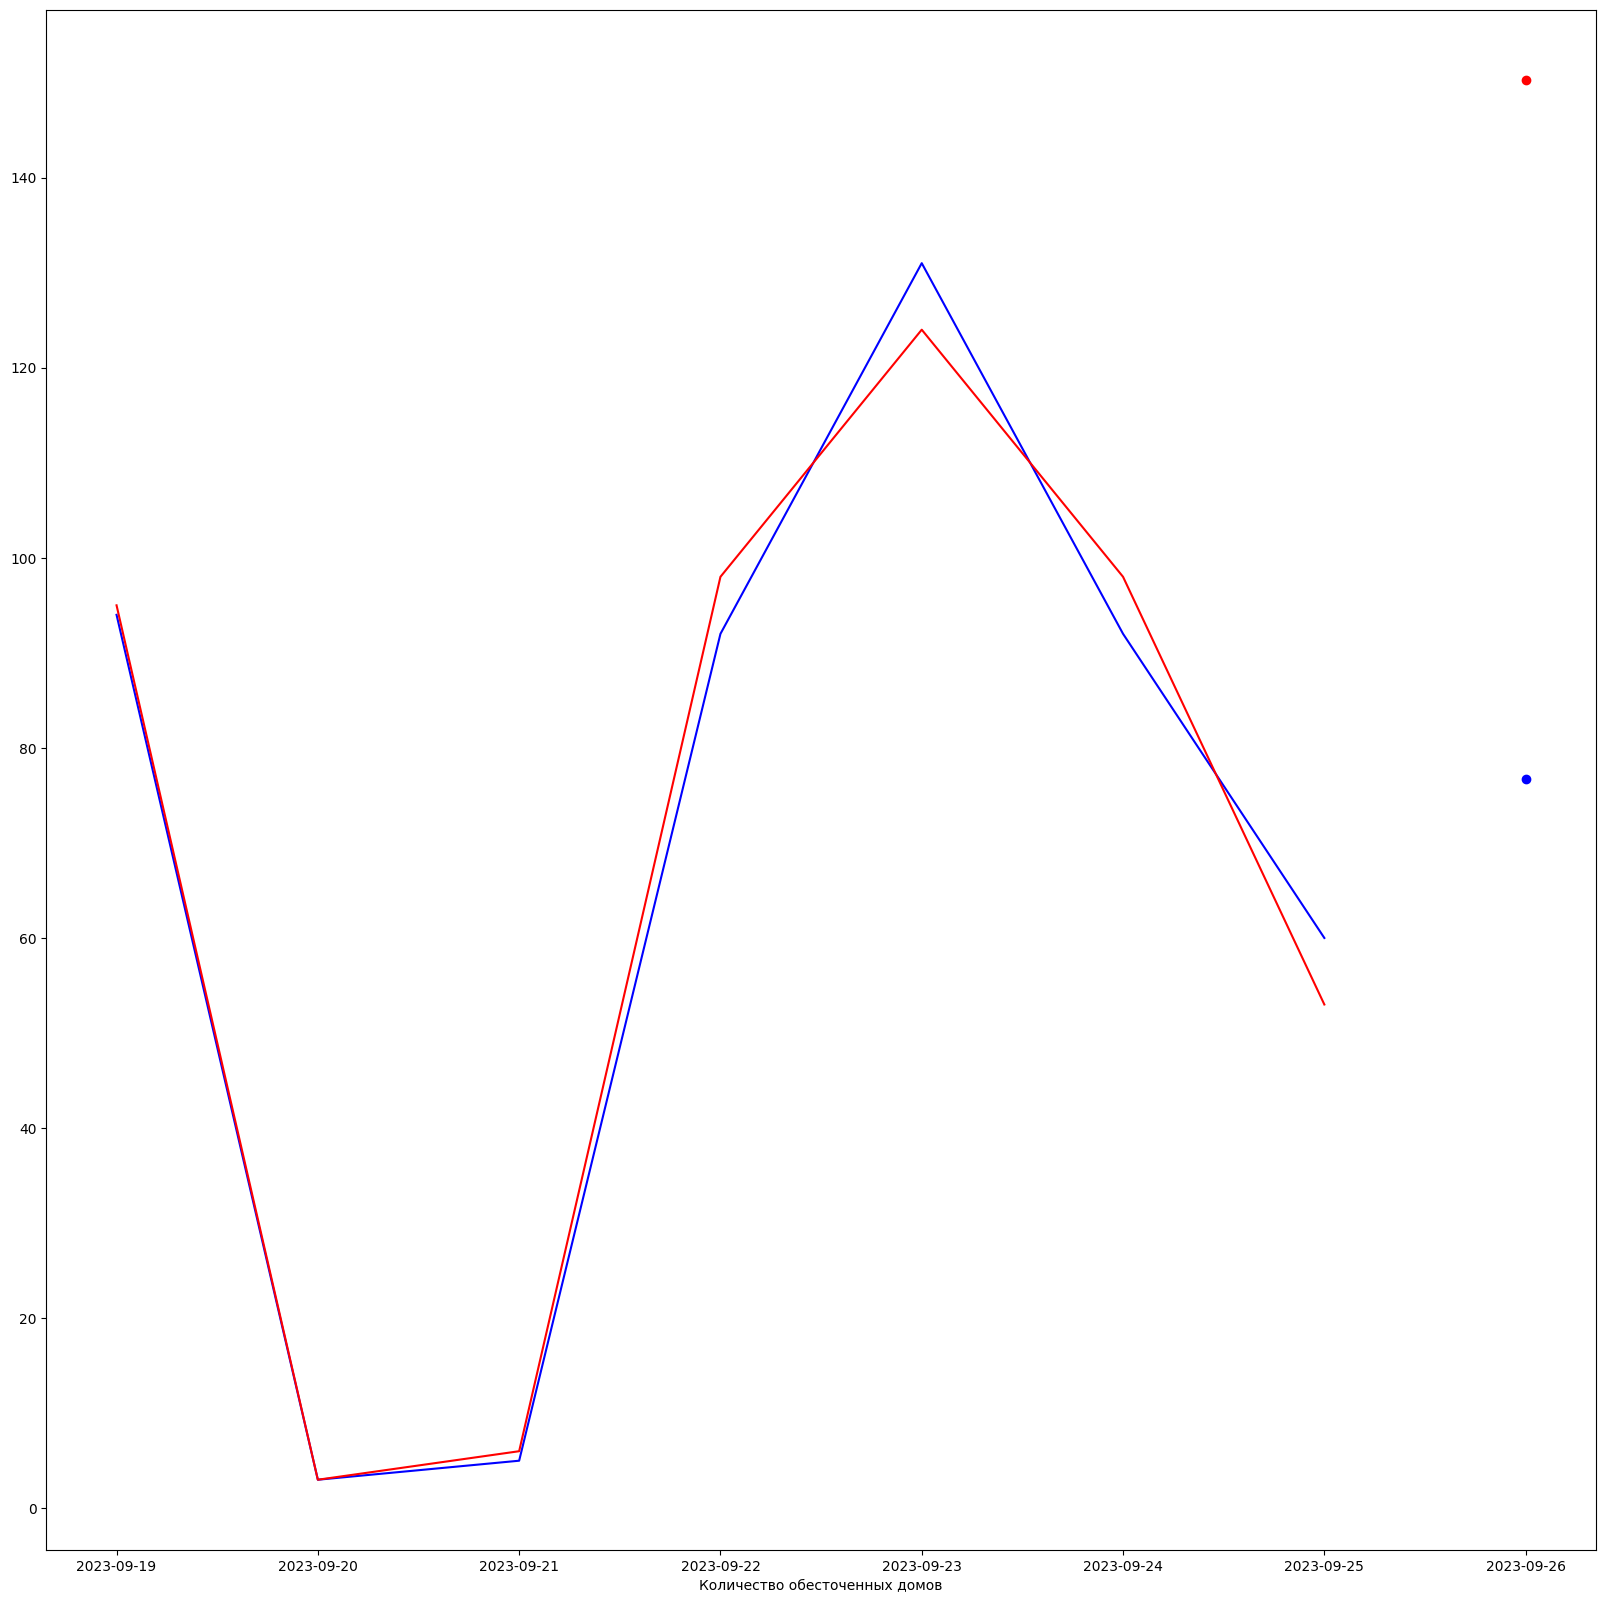

In [29]:
counter=[[],[]]
labels=['Время начала отключения', 'Время восстановления отключения']
dates=[]
dates= mydata[labels[0]].dt.date.unique()
for date in dates:
    for i in range(2):
        counter[i].append(len(mydata[mydata[labels[i]].dt.date==date]))
dates.sort()

weights=[0.6, 0.3, 0.1]
result =0.0
results=[]
for count in counter:
    for n in range(len(weights)):
        result += pd.Series(count).iloc[-n-1] * weights[n]
    result = float(result)
    results.append(result)
    
fig, ax = plt.subplots(figsize=(20, 20))
ax.set_xlabel('Количество обесточенных домов')
ax.plot(dates,counter[0],color='blue')
ax.plot(dates,counter[1],color='red')
dates = np.append(dates,dates[len(dates)-1]+datetime.timedelta(days=1))
plt.scatter(dates[len(dates)-1],results[0],color='blue')
plt.scatter(dates[len(dates)-1],results[1],color='red')
plt.show()

In [30]:
mydata_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 477 entries, 4 to 554
Data columns (total 14 columns):
 #   Column                                                Non-Null Count  Dtype         
---  ------                                                --------------  -----         
 0   Регион РФ(область, край, город фед. значения, округ)  477 non-null    int32         
 1   Административный район                                477 non-null    object        
 2   Населённый пункт                                      477 non-null    int32         
 3   Улица                                                 477 non-null    object        
 4   Филиал                                                477 non-null    int32         
 5   РЭС                                                   477 non-null    object        
 6   Комментарий                                           477 non-null    object        
 7   Id здания                                             255 non-null    float64   

In [31]:
mydata_copy['Время начала отключения']= mydata_copy['Время начала отключения'].astype('int64')
mydata_copy['Время восстановления отключения']= mydata_copy['Время начала отключения'].astype('int64')

In [32]:
mydata_copy

,"Регион РФ(область, край, город фед. значения, округ)",Административный район,Населённый пункт,Улица,Филиал,РЭС,Комментарий,Id здания,Координаты,Время начала отключения,Время восстановления отключения,Код района,Код РЭС,Период отключения(в часах)
4,1,Всеволожский район,177,,6,Сертоловский РЭС,,NaN,NaN,1695636000000000000,1695636000000000000,6,24,7
8,1,Бокситогорский район,95,,7,Бокситогорский РЭС,,NaN,NaN,1695636000000000000,1695636000000000000,2,1,3
9,1,Гатчинский район,107,,8,Пушкинский РЭС,,NaN,NaN,1695636000000000000,1695636000000000000,9,21,7
11,1,Всеволожский район,64,,6,Всеволожский РЭС,,NaN,NaN,1695636000000000000,1695636000000000000,6,4,7
12,1,Ломоносовский район,123,,8,Красносельский РЭС,,NaN,NaN,1695636000000000000,1695636000000000000,19,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
550,2,Петроградский район,63,"Петровский пр., д. 20 лит.",3,Островной РЭС,,18468.0,"[59.959628646,30.266563336]",1695117600000000000,1695117600000000000,23,16,8
551,2,Петроградский район,63,"Петроградская наб., д. 26",3,Островной РЭС,,45935.0,"[59.960926086,30.333552441]",1695117600000000000,1695117600000000000,23,16,8
552,2,Адмиралтейский район,63,"Рижский пр., д. 58,",3,Центральный РЭС,Аварийные работы,218689.0,"[59.913039035,30.275333913]",1695117600000000000,1695117600000000000,1,27,12
553,2,Красногвардейский район,63,"Пискаревский пр., д.37",3,Восточный РЭС,,36407.0,"[59.977813167,30.420732429]",1695117600000000000,1695117600000000000,15,3,7


Какие населёные пункты ждёт отключение

In [33]:
labels_drop=['Административный район','Улица','РЭС','Комментарий','Координаты']
X=mydata_copy.drop(labels_drop, axis=1)
X.drop('Населённый пункт',axis=1)
y=mydata_copy['Населённый пункт']
X=X.fillna(-999)
y=y.fillna(-999)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test,y_test)
print(accuracy)
predictions = model.predict(X_test)
print(predictions.astype(int))

0.9999995336750779
[ 63 157 156  62  91  60 112  69  63  62  89  92 109  71 166 166  27 118
 166 166 166 137 112 175 128 120 122  36 175  63  22  19 166 166 180  90
 166 109 152 166  63 175  91   2  63 117  36 166  62  62 175 108  63  93
  31 166  62  63  63 168  62  23   9  82  89  95 175 158  74 108 127 125
 175  93 166  62  16  77 166  70 166 175 175  37 132  63  90 135  62  59
  34  63 175 123  88  63  99  34 166 166 175 168  62 146  11 167  86   4
 181  29 167   1  62  63  48  14  82  91 166  35  18 166  49 112  91  67
 165 160 179 148 175  33 144  62  79  88  62 175 123  37 166 172  82  63]


In [34]:
towns= encoder['Населённый пункт'].inverse_transform(predictions.astype(int))
print('Какие населёные пункты ждёт отключение:\n')
for i in range(10):
    print(pd.Series(towns).value_counts().index[i])

Какие населёные пункты ждёт отключение:

п.Комарово
Санкт-Петербург
СТ Рассвет
п.Ушково
г. Санкт-Петербург
Шириничи
д.Андреево,  д.Багольник
г. Пушкин,  п. Александровская
г.Зеленогорск
Лахта,  Ольгино


Какие РЭС вероятно отключат электроснабжение

In [35]:
y=mydata_copy['Код РЭС']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
model = LinearRegression()
model.fit(X_train, y_train)
accuracy = model.score(X_test,y_test)
print(accuracy)
predictions = model.predict(X_test)
print(predictions.astype(int))

1.0
[ 4 11 11 11 14 22 11 15  3 11 11 26 11 16 16 26 10  7 13  3 20 10 11 21
 27 11  0 11 21 17 14 12 26 13 11  7 11 29 11  9  7 10 21 21 17 15 20 11
 26 24 24 25 11  3 14 11 11 11  9 10 11  7 20 12 14  3  0 17 14  2 11 24
 14 11 11 25 25 13  3  3 11 29  7 21 16 11 19 20  1 28 20 11 28 11 12 21
 11 11 11 25  9 11 20 15  3 11 11  4 15  2 10 11 11 10 11 11  7 22 25 11
  4 11 13 13  0 23 11 16 20  0 12  3 10  2 12  3 13 10  8 11  8  4 11 10]


In [36]:
predictions=predictions.astype(int)
print('Какие РЭС вероятно отключат электроснабжение:\n')
for i in range(10):
    d=mydata_copy[mydata_copy['Код района']== pd.Series(predictions).value_counts().index[i]]['Административный район'].iloc[:1].to_numpy()
    if d.size>0:
        print(d[0])

Какие РЭС вероятно отключат электроснабжение:

Кингисеппский район
Василеостровский район
Калининский район
Лужский район
Кировский район (ЛО)
Колпинский район
Московский район
Выборгский район (ЛО)
Киришский район
Приморский район (СПб)


In [39]:
!pip install pipreqsnb
import pipreqsnb 

In [40]:
!pipreqsnb .

pipreqs  .

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in .\requirements.txt
